# Statistical Distance optimization for Ising model

This notebook illustrates statistical distance optimization for the Ising model.

*Authors: Mani Valleti, Rama Vasudevan



In [ ]:
#@title Install/Import

!git clone https://github.com/ramav87/ising_sim

import numpy as np
from numpy.random import rand
import pickle
import os
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from ising_sim.src.isingsim import IsingSim, compress_histogram, load_club_list, sd2_loss, loss_func

np.random.seed(42)

fatal: destination path 'ising_sim' already exists and is not an empty directory.


Here let's run a simple 2D Ising model and plot the results


In [ ]:
#Set up interactions for the Ising model. We can use one value or draw from distributions
#For now we will draw from a normal distribution
N = 20
J_mat = np.random.normal(loc=0.1, scale=0.01, size=(N,N))

ising_model =  IsingSim(N=N, J_mat = J_mat, save_trajectories=True, T = 2.0, eqSteps = 500, mcSteps = 500)
ising_model.performIsingSim()



---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 81.34it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 44.80it/s]

Completed. Saving


'Completed simulation'

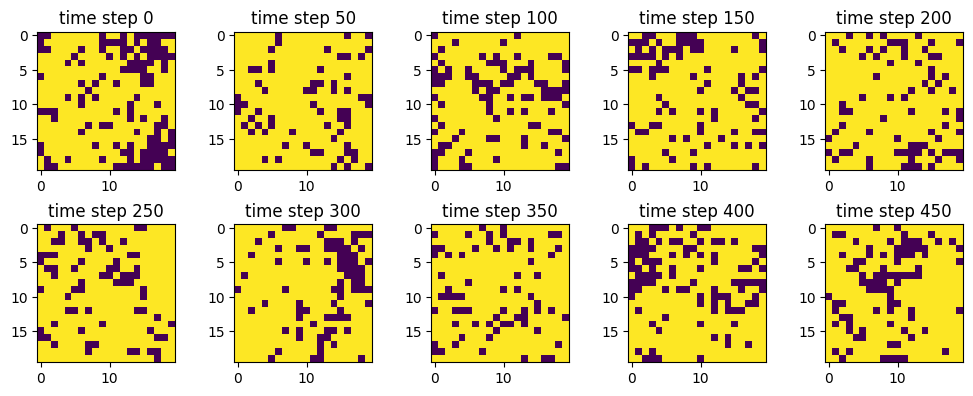

In [ ]:
#Plot the configurations for different time steps

fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (10,4))
time_vals = np.arange(0, ising_model.results['config'].shape[0], step=ising_model.results['config'].shape[0]//10)
for ind, ax in enumerate(axes.flat):
  tval = int(time_vals[ind])
  ax.imshow(ising_model.results['config'][tval,:,:])
  ax.set_title('time step {}'.format(tval))
fig.tight_layout()

In [ ]:
#Now let's do this for different temperatures and check what happens

temp_vals = np.linspace(0.5,5,20)

ising_results_temps = []
for temp in temp_vals:
  ising_model =  IsingSim(N=N, J_mat = J_mat, save_trajectories=True, T = temp, eqSteps = 500, mcSteps = 500)
  ising_model.performIsingSim()
  ising_results_temps.append(ising_model.results)


---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 85.74it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 44.60it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 77.03it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:10<00:00, 46.12it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 82.99it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 44.68it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 86.93it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 42.42it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:07<00:00, 69.90it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 44.62it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 89.02it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 44.66it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 77.46it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.47it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 88.28it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:13<00:00, 36.47it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:08<00:00, 61.47it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 44.29it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:07<00:00, 66.99it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:14<00:00, 34.34it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:12<00:00, 40.78it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.62it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 85.98it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.46it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 74.59it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.61it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 85.41it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.66it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 74.06it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.67it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 75.66it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 42.72it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 75.16it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:12<00:00, 41.59it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 86.02it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.35it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 74.64it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.92it/s]


Completed. Saving

---Performing Equlibration---



100%|██████████| 500/500 [00:05<00:00, 86.52it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 43.97it/s]

Completed. Saving


Text(0, 0.5, 'Heat Capacity')

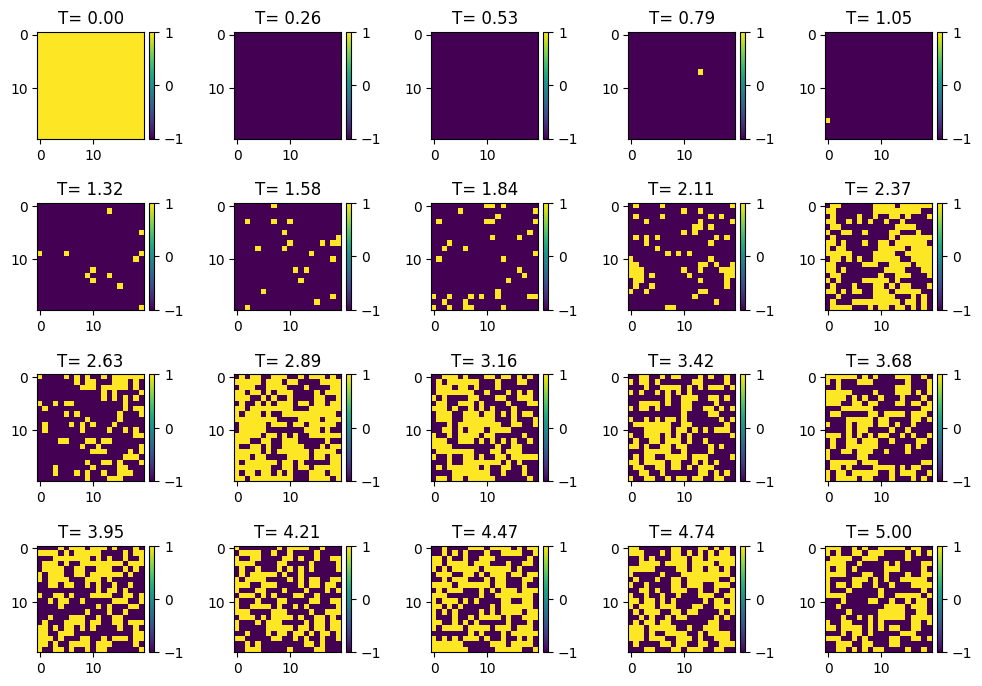

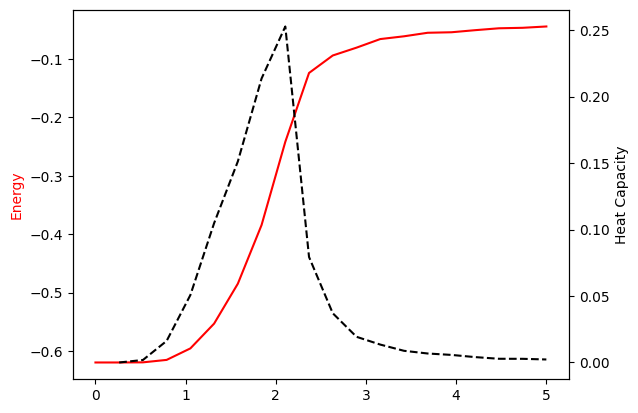

In [ ]:
#Let's plot the results as a function of temperature
fig, axes = plt.subplots(nrows=4, ncols=5, figsize = (10,7))
for ind, ax in enumerate(axes.flat):
  ising_mod = ising_results_temps[ind]
  im1 = ax.imshow(ising_mod['config'][-1,:,:], vmin = -1, vmax = 1)
  temp_val = temp_vals[ind]
  ax.set_title('T= {:.2f}'.format(temp_val))
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.05)
  fig.colorbar(im1, cax=cax, orientation='vertical')

fig.tight_layout()

energies = [ising_mod['Energy'] for ising_mod in ising_results_temps]
heat_capacity = [ising_mod['SpecificHeat'] for ising_mod in ising_results_temps]
plt.figure()
plt.plot(temp_vals, energies, 'r-')
plt.ylabel('Energy', color = 'red')
ax2 = plt.twinx()
ax2.plot(temp_vals, heat_capacity, 'k--')
ax2.set_ylabel('Heat Capacity', color = 'black')

# Ising Model Configurations

The following are six possible configurations, if we consider only the nearest neighbors. We will need to create a function to calculate these for every image.

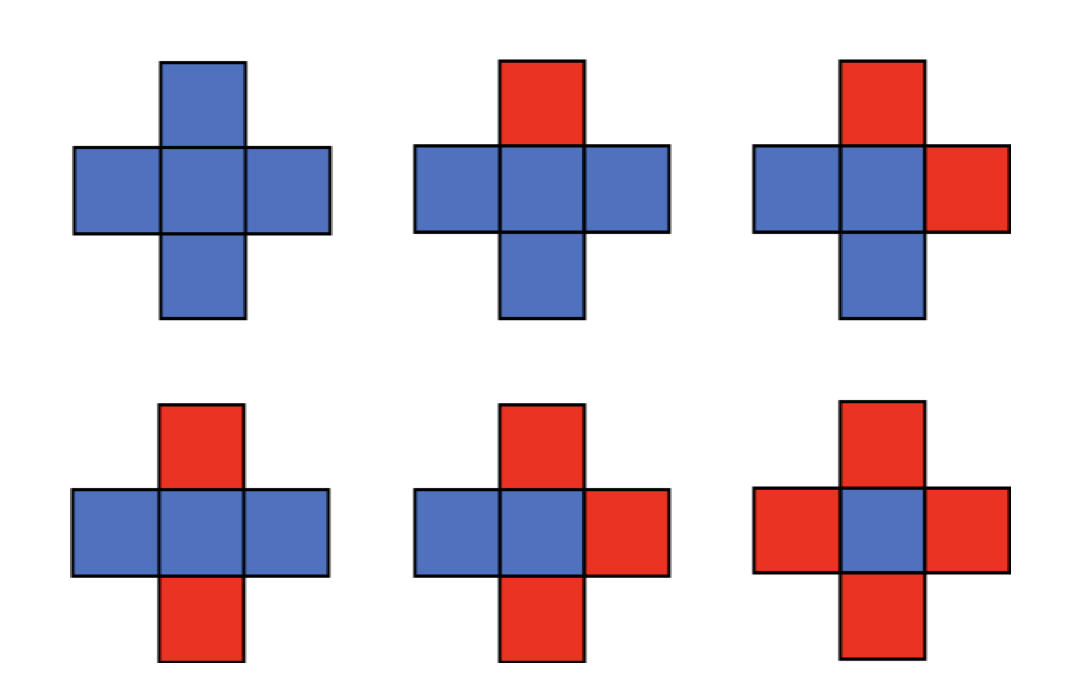

In [ ]:
#Let's make a figure given a nearest neighbor configuration, helps us visualize things
def make_configs_fig(config_list):
  conf_arr = np.full((3,3), np.nan)
  conf_arr[1,1] = config_list[0]
  conf_arr[0,1] = config_list[1]
  conf_arr[1,2] = config_list[2]
  conf_arr[1,0] = config_list[3]
  conf_arr[2,1] = config_list[4]
  return conf_arr

## Enumerate through all possible configurations

Since we have four nearest neighbors (plus the center lattice site), we have 2^5 =32 possible configurations. Let's enumerate throuhg them all...

In [ ]:
#Let's write down possible configurations for nearest neighbors
all_configs = [
               #Configurations

               #all -1 -> join with last
               [-1,-1,-1,-1,-1],               #1

               #one 1 -> all together now
               [-1,-1,-1,-1,1],               #2
               [-1,-1,-1,1,-1],               #3
               [-1,-1,1,-1,-1],               #4
               [-1,1,-1,-1,-1],               #5
               [1,-1,-1,-1,-1],               #6

               #two 1s -> all together now
               [1,1,-1,-1,-1],               #7
               [1,-1,1,-1,-1],               #8
               [1,-1,-1,1,-1],               #9
               [1,-1,-1,-1,1],               #10
               [-1,1,1,-1,-1],               #11
               [-1,1,-1,1,-1],               #12
               [-1,1,-1,-1,1],               #13
               [-1,-1,1,1,-1],               #14
               [-1,-1,1,-1,1],               #15
               [-1,-1,-1,1,1],               #16

               #three ones -> go into two types
               [1,1,1,-1,-1],               #17
               [1,1,-1,1,-1],               #18
               [1,1,-1,-1,1],               #19
               [1,-1,1,1,-1],               #20
               [1,-1,1,-1,1],               #21
               [1,-1,-1,1,1],               #22
               [-1,1,1,1,-1],               #23
               [-1,1,-1,1,1],               #24
               [-1,-1,1,1,1],               #25
               [-1,1,1,-1,1],               #26

               #four 1s -> all together now
               [1,-1,1,1,1],               #27
               [1,1,-1,1,1],               #28
               [1,1,1,-1,1],               #29
               [1,1,1,1,-1],               #30
               [-1,1,1,1,1],               #31

               #five 1s -> join with first
               [1,1,1,1,1],               #32
      ]


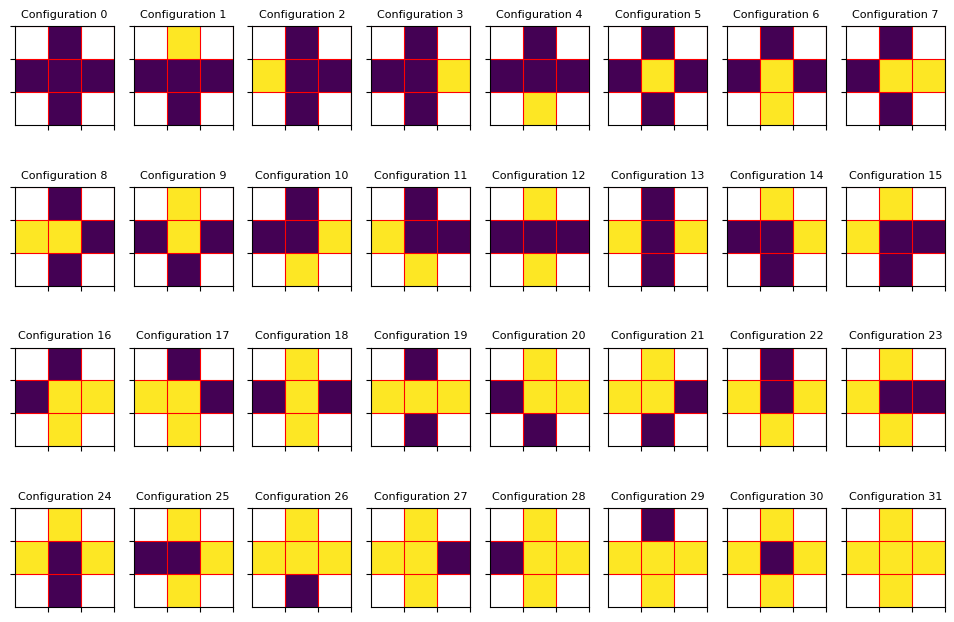

In [ ]:
fig, axes = plt.subplots(figsize = (12,8), nrows=4, ncols = 8)
ax_flat = axes.flat
for ind, config in enumerate(all_configs):
  configs_schematic = make_configs_fig(config)
  ax_flat[ind].imshow(configs_schematic, vmin = -1, vmax = 1, origin = "lower")
  ax_flat[ind].set_xticks([.5,1.5,2.5])
  ax_flat[ind].set_yticks([.5,1.5,2.5])
  ax_flat[ind].set_xticklabels([])
  ax_flat[ind].set_yticklabels([])
  ax_flat[ind].grid(visible = True, axis = 'both',which = 'major', color = 'r')
  ax_flat[ind].set_title('Configuration {}'.format(ind), fontsize = 8)

## Group them together

By symmetry we can group together many of these configurations. Let's work on that!

In [ ]:
#Most of those configurations are in fact the same (by symmetry).
#In fact we can reduce them to the six shown in the earlier graphic

configs_grouped_list = [[0,31],
                        [1,2,3,4,26,27,28,29],
                        [10,11,14,15,16,17,20,21],
                        [12,13,18,19],
                        [22,23,24,25,9,8,7,6],
                        [5,30]]


In [ ]:
#Now let's plot assemble these groupings

grouped_configs_arrays = []
grouped_configs = []
for configs in configs_grouped_list:
  my_configs = [all_configs[ind] for ind in configs]
  grouped_configs.append(my_configs)
  grouped_configs_arrays.append([make_configs_fig(cfig) for cfig in my_configs])


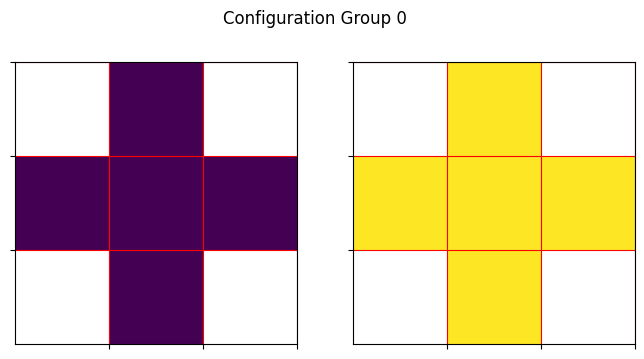

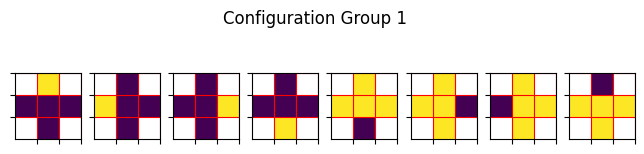

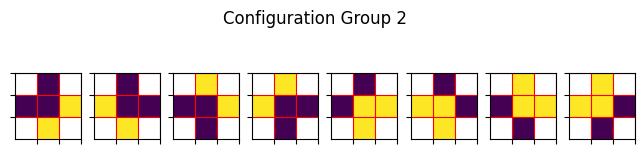

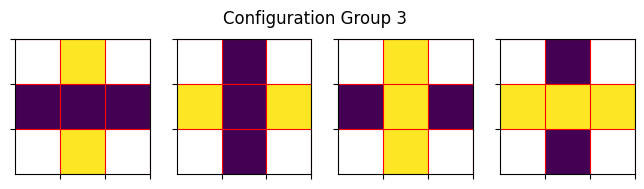

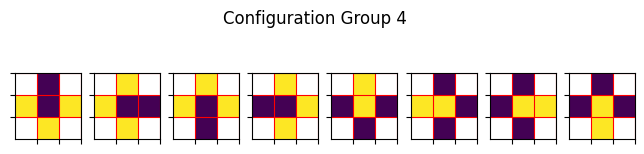

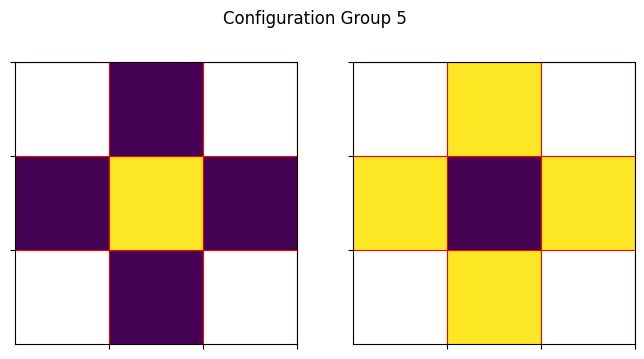

In [ ]:
#We can plot them:
for k, gcfig in enumerate(grouped_configs_arrays):
  figsize = (8,4)
  if len(gcfig)>=4:
    figsize = (8,2)

  fig, axes = plt.subplots(figsize = figsize, nrows=1, ncols = len(gcfig))

  for ind, config in enumerate(gcfig):
    axes[ind].imshow(config, vmin = -1, vmax = 1, origin = "lower")
    axes[ind].set_xticks([.5,1.5,2.5])
    axes[ind].set_yticks([.5,1.5,2.5])
    axes[ind].set_xticklabels([])
    axes[ind].set_yticklabels([])
    axes[ind].grid(visible = True, axis = 'both',which = 'major', color = 'r')
  fig.suptitle('Configuration Group {}'.format(k), fontsize = 12)

In [ ]:
#Now that we have the configurations we can try to calculate the histograms

def retrieve_histograms_norm(config, configs_grouped_list, all_configs, verbose = False):
  '''
  This function takes as input an image, and a list of the configurations grouped as well as all
  config: (N*N matrix) of the Ising Model configuration
  configs_grouped_lsit: List of groupings of the configurations in the enumerated configurations
  all_configs: List of all the possible configurations

  Returns: Normalized histogram of the counts of the number of each configuation present in the image
  '''

  N = config.shape[0]
  total = N*N
  stats_config = np.zeros(shape=6)
  for i in range(N):
      for j in range(N):
          cen = config[i,j]
          a = config[(i+1)%N,j]
          b = config[i,(j+1)%N]
          c = config[(i-1)%N,j]
          d = config[i,(j-1)%N]
          l_config = [cen,a,b,c,d]#local config
          config_idx = all_configs.index(l_config) #find which one it corresponds to
          if verbose:
            print('This configuration {} has index {}'.format(l_config, config_idx))

          #Next find the group. I am doing this in the most trivial way; it is probably quite slow.
          #Can you think of a faster way?
          config_group = np.nan
          for group_idx, cfigs in enumerate(configs_grouped_list):
            if verbose:
              print(config_idx, group_idx, cfigs)
            if config_idx in cfigs:
              config_group = group_idx
          if config_group==np.nan:
            raise ValueError('ERROR! Could not match group for configuration {} with index {}'.format(l_config, config_idx))

          stats_config[config_group]+=1
  print(stats_config/total)
  return stats_config/total



In [ ]:
#Let's plot the results as configurational histograms
#First let's compute the histograms

config_hists = []
for ising_mod in ising_results_temps: #iterate through the simulation results
  config = ising_mod['config'][-1,:,:] #grab the last configuration in the sim

  config_hists.append(retrieve_histograms_norm(config, configs_grouped_list, all_configs))

config_hists = np.array(config_hists)

[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0.9875 0.01   0.     0.     0.     0.0025]
[0.9875 0.01   0.     0.     0.     0.0025]
[0.87   0.0875 0.0075 0.0025 0.0075 0.025 ]
[0.76  0.175 0.015 0.    0.005 0.045]
[0.6225 0.245  0.03   0.01   0.035  0.0575]
[0.475  0.2725 0.105  0.0275 0.0375 0.0825]
[0.18   0.3    0.1625 0.1    0.175  0.0825]
[0.325  0.3025 0.135  0.0375 0.1475 0.0525]
[0.155  0.3225 0.2    0.0825 0.1675 0.0725]
[0.095  0.3325 0.185  0.1375 0.1875 0.0625]
[0.09   0.2625 0.2375 0.1175 0.2325 0.06  ]
[0.1075 0.265  0.285  0.08   0.205  0.0575]
[0.1075 0.3    0.26   0.07   0.21   0.0525]
[0.085 0.28  0.26  0.085 0.23  0.06 ]
[0.065  0.285  0.2275 0.075  0.28   0.0675]
[0.105  0.26   0.2075 0.14   0.225  0.0625]
[0.0825 0.3025 0.28   0.1025 0.1875 0.045 ]


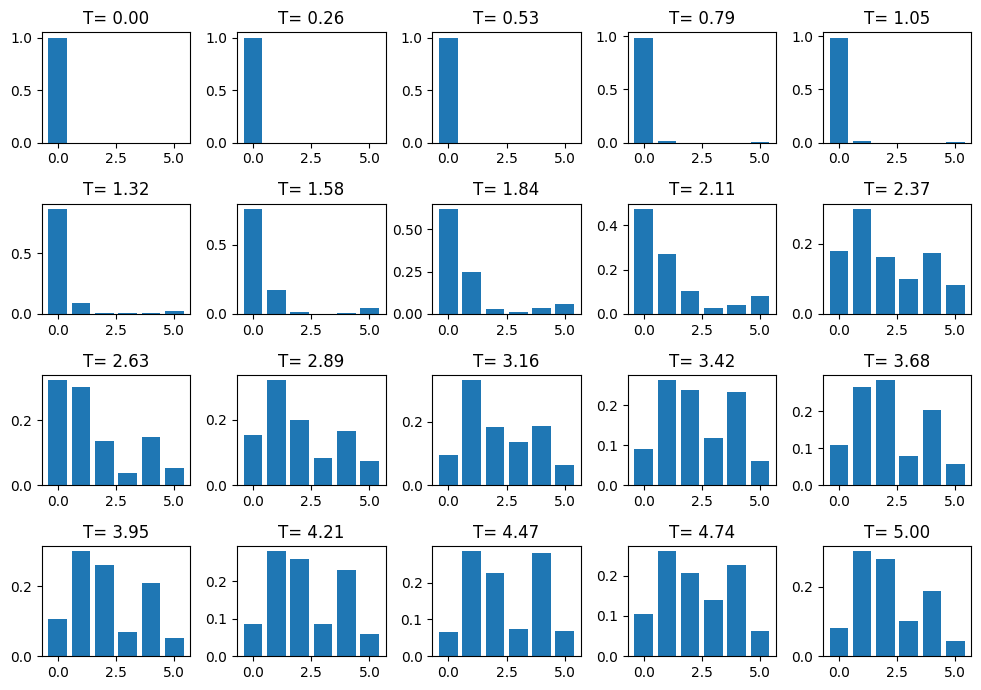

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize = (10,7))
for ind, ax in enumerate(axes.flat):
  im1 = ax.bar(x=np.arange(len(config_hists[ind])), height=config_hists[ind])
  temp_val = temp_vals[ind]
  ax.set_title('T= {:.2f}'.format(temp_val))

fig.tight_layout()

In [ ]:
#Now let's see what happens if we have a single snapshot from a differnet simulation, at a similar temperature
#let's then plot the histogram.

#We will call this the 'experiment'
#In this case let's choose a temperature, say 3.16, because there is a similar one in the simulations.

J_mat = np.random.normal(loc=0.2, scale=0.01, size=(N,N))

ising_model_exp =  IsingSim(N=N, J_mat = J_mat, save_trajectories=True, T = 3.16, eqSteps = 500, mcSteps = 500)
ising_model_exp.performIsingSim()



---Performing Equlibration---



100%|██████████| 500/500 [00:06<00:00, 79.41it/s]



---Finished...
----Performing MC Moves----



100%|██████████| 500/500 [00:11<00:00, 45.41it/s]

Completed. Saving


'Completed simulation'

In [ ]:
#Now let's calculate the histogram from the experiment
exp_config = ising_model_exp.results['config'][-1,:,:] #grab the last configuration in the sim
exp_histogram = retrieve_histograms_norm(exp_config, configs_grouped_list, all_configs)

sim_config = ising_results_temps[12]['config'][-1,:,:]
sim_histogram =  retrieve_histograms_norm(sim_config, configs_grouped_list, all_configs)

[0.71  0.205 0.005 0.015 0.015 0.05 ]
[0.095  0.3325 0.185  0.1375 0.1875 0.0625]


Text(0.5, 1.0, 'Experiment')

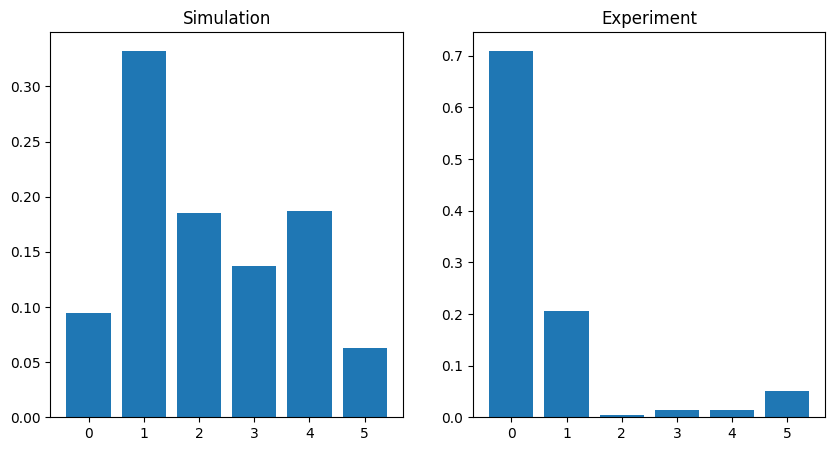

In [ ]:
#Now plot both of the histograms together

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
axes[0].bar(x =np.arange(len(sim_histogram)), height = sim_histogram)
axes[0].set_title('Simulation')
axes[1].bar(x =np.arange(len(exp_histogram)), height = exp_histogram)
axes[1].set_title('Experiment')

In [ ]:
#here there is clearly a very large discrepancy between the simulation and the experiment.
#Let's calculate the statistical distance between these two histograms

def statistical_distance(sim_histogram, exp_histogram):
  #Returns the statistical distance**2 between two histograms
  s = np.zeros(sim_histogram.shape[0])
  for i in range(len(s)):
    s[i] = np.arccos(np.dot(np.sqrt(sim_histogram[i]),np.sqrt(exp_histogram[i])))
  return np.sum(np.square(s))

s_sq = statistical_distance(sim_histogram, exp_histogram)
print("Statistical Distance between these two histograms is {:.2f}".format(s_sq))

Statistical Distance between these two histograms is 12.72


# To Do:

For you to do: Now, redo the simulation with different values of J (some closer to the true value, some away from it). Calculate the statistical distance between the resulting simulation and experimental distributions.

In [ ]:
#